# Ring Manifold using head-direction neurons

This tutorial shows how to make a ring manifold in 2 dimensiosn.

See the [documentation](https://peyrachelab.github.io/pynapple/) of pynapple to see how to install the package. 

The example data can be found [here](https://www.dropbox.com/s/1kc0ulz7yudd9ru/A2929-200711.tar.gz?dl=1)



In [1]:
import numpy as np
import pandas as pd
import pynapple as nap
from matplotlib.pyplot import *
import pynacollada as pyna
from sklearn.manifold import Isomap
from matplotlib.colors import hsv_to_rgb
import seaborn as sns
sns.set_theme(style="darkgrid")

Let's load the data.

In [2]:
data_directory = '/home/guillaume/pynapple/data/A2929-200711'

data = nap.load_session(data_directory, 'neurosuite')

spikes = data.spikes.getby_category('location')['adn']
angle = data.position['ry']

First step is to bin the data. We can use the function count from pynapple.

In [3]:
bin_size = 0.2 #seconds
count = spikes.count(bin_size, angle.time_support)

It's usually better to square root the rate and smooth it.

In [4]:
count = count.as_dataframe()
rate = np.sqrt(count/bin_size)
rate = rate.rolling(window=50,win_type='gaussian',center=True,min_periods=1, axis = 0).mean(std=2)

Second step is to call the Isomap function from scikit-learn.

In [5]:
projection = Isomap(n_components = 2, n_neighbors = 50).fit_transform(rate.values)

To color the ring, we need to bin the angle and convert the angle into the HSV format.

In [6]:
ep = angle.time_support
bins = np.arange(ep.as_units('s').start.iloc[0], ep.as_units('s').end.iloc[-1]+bin_size, bin_size)
tmp = angle.as_units('s').groupby(np.digitize(angle.as_units('s').index.values, bins)-1).mean()

H = tmp.values/(2*np.pi)
HSV = np.vstack((H, np.ones_like(H), np.ones_like(H))).T
RGB = hsv_to_rgb(HSV)

Let's plot the ring.

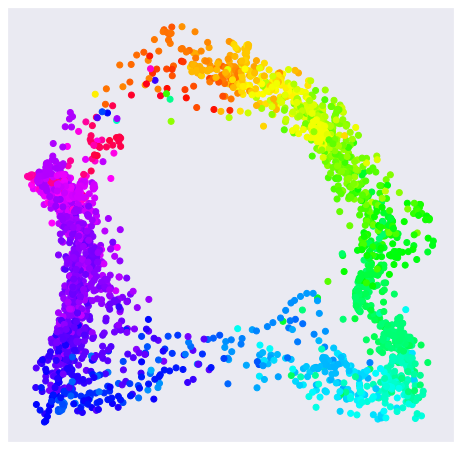

In [7]:
figure(figsize = (8,8))
scatter(projection[:,0], projection[:,1], c = RGB)
xticks([])
yticks([])
show()